In [162]:
import pickle
import pandas as pd
from tqdm import tqdm

In [175]:
origin_data = pd.read_csv('/home/fangbing/SipAlarmAnalysis/lanjun_alarms_20210712.csv')
origin_rule_ids = list(origin_data['rule_id'])
origin_hole_ids = list(origin_data['hole_id'])
origin_log_ids = list(origin_data['log_id'])

origin_log_hole_rule = {}
for lid,hid,rid in zip(origin_log_ids,origin_hole_ids,origin_rule_ids):
    origin_log_hole_rule[lid]={'hole_id':hid,'rule_id':rid}
print(len(origin_data))
origin_data.head()

127092


/root/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (12,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Unnamed: 0               log_id         src_ip  src_port        dst_ip  \
0           0  6820018458240450560  192.168.159.3     53238  10.67.201.94   
1           1  6820018458244644864  192.168.159.3     53238  10.67.201.94   
2           2  6820018458244644865  192.168.159.3     53238  10.67.201.94   
3           3  6820018458244644866  192.168.159.3     53238  10.67.201.94   
4           4  6820018458244644867  192.168.159.3     52987  10.67.201.94   

   dst_port  record_time  record_type  net_action  reliability  level  \
0      1433   1626019503            4           1            0      1   
1      1433   1626019503            3           1            1      2   
2      1433   1626019503            4           1            0      1   
3      1433   1626019503            3           1            1      2   
4      1433   1626019503            3           1            1      1   

   status_code  url   hole_id   rule_id module_attack payload req_body  \
0          404  NaN  17120015         0       213|1|0     NaN      NaN   
1          404  NaN       687  10600010        30|6|1     NaN      NaN   
2          404  NaN  17120015         0       213|1|0     NaN      NaN   
3          404  NaN       687  10600010        30|6|1     NaN      NaN   
4          404  NaN  11080015  10600014       204|2|1     NaN      NaN   

  rsp_body                 srcip_dstip  
0      NaN  192.168.159.3_10.67.201.94  
1      NaN  192.168.159.3_10.67.201.94  
2      NaN  192.168.159.3_10.67.201.94  
3      NaN  192.168.159.3_10.67.201.94  
4      NaN  192.168.159.3_10.67.201.94

In [176]:
tdf = origin_data.loc[origin_data['rule_id']==0]
print(len(tdf))
print(set(tdf['hole_id']))
tdf.head()

122
{17120015}


Unnamed: 0               log_id         src_ip  src_port        dst_ip  \
0            0  6820018458240450560  192.168.159.3     53238  10.67.201.94   
2            2  6820018458244644865  192.168.159.3     53238  10.67.201.94   
15          15  6820025435922333697  192.168.159.3     55389  10.67.201.94   
17          17  6820025435922333699  192.168.159.3     55389  10.67.201.94   
42          42  6820036117942206465  192.168.159.3     55199  10.67.201.94   

    dst_port  record_time  record_type  net_action  reliability  level  \
0       1433   1626019503            4           1            0      1   
2       1433   1626019503            4           1            0      1   
15      1433   1626021156            4           1            0      1   
17      1433   1626021156            4           1            0      1   
42      1433   1626023708            4           1            0      1   

    status_code  url   hole_id  rule_id module_attack payload req_body  \
0           404  NaN  17120015        0       213|1|0     NaN      NaN   
2           404  NaN  17120015        0       213|1|0     NaN      NaN   
15          404  NaN  17120015        0       213|1|0     NaN      NaN   
17          404  NaN  17120015        0       213|1|0     NaN      NaN   
42          404  NaN  17120015        0       213|1|0     NaN      NaN   

   rsp_body                 srcip_dstip  
0       NaN  192.168.159.3_10.67.201.94  
2       NaN  192.168.159.3_10.67.201.94  
15      NaN  192.168.159.3_10.67.201.94  
17      NaN  192.168.159.3_10.67.201.94  
42      NaN  192.168.159.3_10.67.201.94

In [299]:
# df = pd.read_csv('nodeDF_lanjun_20210712.csv')
df = pd.read_csv('/home/fangbing/SipAlarmAnalysis/datas/node_lanjun_20210712.csv')
print(len(df))
df = df.loc[df['dst_ip'] != '0.0.0.0']
print(len(df))
df.head()

1137
1137


Unnamed: 0   id                                             log_id  \
0           0  717  ['6820018458240450560', '6820018458244644864',...   
1           1  715     ['6820018458244644868', '6820018458244644867']   
2           2  573     ['6820133139631329280', '6820018458244644869']   
3           3  415  ['6820019656680034304', '6820019656600342528',...   
4           4  419                            ['6820018687518986240']   

          src_ip                      src_port        dst_ip  \
0  192.168.159.3  [53238, 53238, 53238, 53238]  10.67.201.94   
1  192.168.159.3                [53238, 52987]  10.67.201.94   
2  192.168.159.3                [61320, 54438]  10.67.201.80   
3  192.168.159.3  [54551, 54551, 54551, 54551]  10.67.201.80   
4  192.168.159.3                       [56037]  10.67.201.80   

                   dst_port           record_type    net_action   reliability  \
0  [1433, 1433, 1433, 1433]  ['4', '3', '4', '3']  [1, 1, 1, 1]  [0, 1, 0, 1]   
1              [1433, 1433]            ['3', '3']        [1, 1]        [1, 1]   
2                [445, 445]            ['3', '3']        [0, 1]        [2, 1]   
3      [445, 445, 445, 445]  ['3', '3', '3', '3']  [0, 0, 0, 0]  [3, 2, 3, 2]   
4                     [445]                 ['3']           [0]           [2]   

   ...           status_code               url                   hole_id  \
0  ...  [404, 404, 404, 404]  ['', '', '', '']       ['17120015', '687']   
1  ...            [404, 404]          ['', '']       ['687', '11080015']   
2  ...              [0, 404]          ['', '']  ['17660003', '11080011']   
3  ...          [0, 0, 0, 0]  ['', '', '', '']  ['17781005', '17781001']   
4  ...                   [0]              ['']              ['17660003']   

                                        rule_id  \
0                    [0, 10600010, 0, 10600010]   
1                          [10600010, 10600014]   
2                         [117660003, 10600014]   
3  [117781005, 117781001, 117781005, 117781001]   
4                                   [117660003]   

                                module_attack  \
0  ['213|1|0', '30|6|1', '213|1|0', '30|6|1']   
1                       ['30|6|1', '204|2|1']   
2                      ['204|2|7', '204|2|1']   
3  ['30|8|1', '212|3|0', '30|8|1', '212|3|0']   
4                                 ['204|2|7']   

                                             payload          req_body  \
0                                   ['', '', '', '']  ['', '', '', '']   
1                                           ['', '']          ['', '']   
2                                           ['', '']          ['', '']   
3  ['{"op_code": 35, "file_id": 0}', '{"path": "\...  ['', '', '', '']   
4                                               ['']              ['']   

           rsp_body  start_time    end_time  
0  ['', '', '', '']  1626019503  1626019503  
1          ['', '']  1626019504  1626019503  
2          ['', '']  1626046824  1626019509  
3  ['', '', '', '']  1626019511  1626019511  
4              ['']  1626019517  1626019517  

[5 rows x 21 columns]

In [300]:
# relDF = pd.read_csv('relDF_lanjun_20210712.csv')
relDF = pd.read_csv('/home/fangbing/SipAlarmAnalysis/datas/edge_lanjun_20210712.csv')

relDF = relDF.sort_values(by = 'src_id')
# relDF = relDF.loc[~relDF['src_id'].isin([0,1,2,3,4,5])]
# relDF = relDF.loc[~relDF['dst_id'].isin([0,1,2,3,4,5])]
print(len(relDF))
relDF.head(20)

779


Unnamed: 0  src_id  dst_id  type  diffTime
671         671       1       4     1       297
765         765       2      30     1         0
672         672       4      31     1         0
772         772       5       3     1         0
683         683       7      10     1       300
676         676       8       7     1         0
684         684      10       9     1         0
691         691      12      11     1         0
700         700      13      14     1         0
715         715      15      17     1       300
716         716      17      18     1         0
723         723      19      20     1         0
733         733      21      22     1         0
740         740      23      24     1         0
744         744      25      26     1         0
755         755      28      27     1         0
709         709      32      41     1       182
686         686      33      52     1         0
659         659      34      47     1         2
658         658      36      34     1         0

In [301]:
df1 = df.drop(['Unnamed: 0','req_body','rsp_body'],axis = 1)
relDF1 = relDF.drop(['Unnamed: 0'],axis = 1)

In [302]:
df1.head()

id                                             log_id         src_ip  \
0  717  ['6820018458240450560', '6820018458244644864',...  192.168.159.3   
1  715     ['6820018458244644868', '6820018458244644867']  192.168.159.3   
2  573     ['6820133139631329280', '6820018458244644869']  192.168.159.3   
3  415  ['6820019656680034304', '6820019656600342528',...  192.168.159.3   
4  419                            ['6820018687518986240']  192.168.159.3   

                       src_port        dst_ip                  dst_port  \
0  [53238, 53238, 53238, 53238]  10.67.201.94  [1433, 1433, 1433, 1433]   
1                [53238, 52987]  10.67.201.94              [1433, 1433]   
2                [61320, 54438]  10.67.201.80                [445, 445]   
3  [54551, 54551, 54551, 54551]  10.67.201.80      [445, 445, 445, 445]   
4                       [56037]  10.67.201.80                     [445]   

            record_type    net_action   reliability         level  \
0  ['4', '3', '4', '3']  [1, 1, 1, 1]  [0, 1, 0, 1]  [1, 2, 1, 2]   
1            ['3', '3']        [1, 1]        [1, 1]        [2, 1]   
2            ['3', '3']        [0, 1]        [2, 1]        [2, 1]   
3  ['3', '3', '3', '3']  [0, 0, 0, 0]  [3, 2, 3, 2]  [1, 2, 1, 2]   
4                 ['3']           [0]           [2]           [2]   

            status_code               url                   hole_id  \
0  [404, 404, 404, 404]  ['', '', '', '']       ['17120015', '687']   
1            [404, 404]          ['', '']       ['687', '11080015']   
2              [0, 404]          ['', '']  ['17660003', '11080011']   
3          [0, 0, 0, 0]  ['', '', '', '']  ['17781005', '17781001']   
4                   [0]              ['']              ['17660003']   

                                        rule_id  \
0                    [0, 10600010, 0, 10600010]   
1                          [10600010, 10600014]   
2                         [117660003, 10600014]   
3  [117781005, 117781001, 117781005, 117781001]   
4                                   [117660003]   

                                module_attack  \
0  ['213|1|0', '30|6|1', '213|1|0', '30|6|1']   
1                       ['30|6|1', '204|2|1']   
2                      ['204|2|7', '204|2|1']   
3  ['30|8|1', '212|3|0', '30|8|1', '212|3|0']   
4                                 ['204|2|7']   

                                             payload  start_time    end_time  
0                                   ['', '', '', '']  1626019503  1626019503  
1                                           ['', '']  1626019504  1626019503  
2                                           ['', '']  1626046824  1626019509  
3  ['{"op_code": 35, "file_id": 0}', '{"path": "\...  1626019511  1626019511  
4                                               ['']  1626019517  1626019517

In [303]:
relDF1.rename(columns=lambda x:x.replace('src_id','source'), inplace=True)
relDF1.rename(columns=lambda x:x.replace('dst_id','target'), inplace=True)
relDF1.rename(columns=lambda x:x.replace('type','weight'), inplace=True)
# relDF1 = relDF1.loc[relDF1['weight'].isin([1,4])]
print(len(relDF1))
relDF1.head()

779


source  target  weight  diffTime
671       1       4       1       297
765       2      30       1         0
672       4      31       1         0
772       5       3       1         0
683       7      10       1       300

In [304]:
print(relDF1.loc[relDF1['source'] == 399])
print(relDF1.loc[relDF1['target'] == 399])

     source  target  weight  diffTime
584     399     218       2        55
     source  target  weight  diffTime
583     217     399       2        15


In [305]:
print(len(relDF1))
relDF1 = relDF1.drop_duplicates()
print(len(relDF1))
print(len(set(df1['id'])))

779
779
1137


In [306]:
listn = list(relDF1['source'])
listn.extend(list(relDF1['target']))
print(len(set(listn)))
print(len(set(df1['id']).difference(set(listn))))

1137
0


In [307]:
sigs = set(df1['id']).difference(set(listn))
df1 = df1.loc[~df1['id'].isin(sigs)]
print(len(df1))

1137


In [308]:
import networkx as nx

In [309]:
# G = nx.from_pandas_edgelist(relDF1, 'source', 'target', edge_attr=True)
G = nx.from_pandas_edgelist(relDF1, 'source', 'target', True, nx.DiGraph())

In [310]:
nx.set_node_attributes(G, df1.set_index('id').to_dict('index'))

In [311]:
G.number_of_nodes()

1137

In [312]:
G.number_of_edges()

779

In [313]:
H = G.to_undirected() 

In [314]:
H.number_of_edges()

779

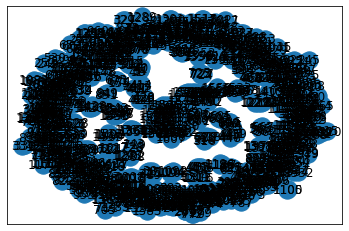

In [315]:
nx.draw_networkx(H)

[399, 215, 216, 217, 218]
[(399, 217), (399, 218), (215, 216), (216, 217)]


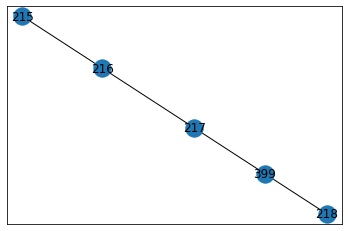

In [350]:
com_count = 0
num_nodes = []
S = [H.subgraph(c).copy() for c in nx.connected_components(H)]
for s in S:
    if 399 in s.nodes:
        print(s.nodes)
        print(s.edges)
#     if s.number_of_nodes() > 5:
        nx.draw_networkx(s,with_labels=True)
#         pos = nx.spring_layout(s)
#         nx.draw_networkx_labels(s, pos)
#         nx.draw_networkx_edges(s, pos, edgelist=s.edges, edge_color='r', arrows=True)
        break
# for com  in list(nx.connected_components(H)):
#     num_nodes.append(len(com))
#     com_count+=1
    
# print(com_count)
# num_nodes.sort()
# print(num_nodes)

In [349]:
print(df1.loc[df1['id'].isin([215,216,214,217,399])]['id'])
print(df1.loc[df1['id'].isin([215,216,214,217,399])]['end_time'])

Series([], Name: id, dtype: int64)
Series([], Name: end_time, dtype: int64)


1
2
5
8
12
13
15
19
21
23
25
28
32
42
49
50
54
56
215
225
242
243
245
248
249
250
253
254
256
264
266
268
[(268, 263)]
(268, 263)
270
272
274
277
280
281
282
284
287
288
289
296
297
299
300
302
303
305
307
310
321
323
328
329
330
331
332
336
337
409
416
422
423
430
434
439
444
449
450
457
458
466
467
474
475
482
485
490
491
500
502
508
509
516
517
528
530
536
537
546
547
553
556
562
569
573
574
582
586
591
596
602
607
611
615
616
618
622
623
626
632
633
637
640
643
648
650
652
653
658
659
665
666
670
673
675
678
680
684
685
689
690
695
696
698
700
707
708
709
711
717
718
721
725
726
730
731
735
768
769
777
781
782
785
789
793
796
800
804
809
811
820
821
822
823
826
828
833
836
839
848
849
850
853
863
864
867
868
869
871
876
882
885
886
890
891
893
898
900
901
906
911
913
915
932
933
935
938
939
940
946
949
951
952
955
956
960
965
969
973
976
986
988
991
1002
1003
1004
1007
1011
1012
1021
1029
1030
1034
1038
1040
1042
1043
1045
1047
1050
1056
1058
1061
1073
1076
1082
1083
1086
1087
1094

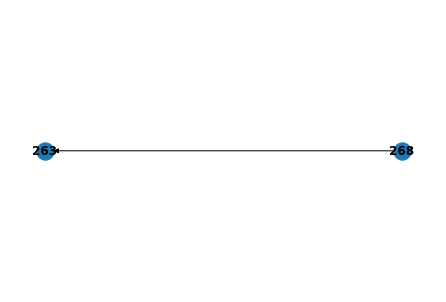

In [348]:
for node in G.nodes():
    if G.in_degree(node)==0:
        print(node)
        if node == 268:
            T2 = nx.dfs_tree(G, source=node,depth_limit=1000)
            edgs = list(T2.edges())
            print(edgs)
            for edg in nx.dfs_edges(G, source=node,depth_limit=1000):
                print(edg)
            pos2 = nx.circular_layout(T2)
            nx.draw(T2, pos2, with_labels=True, font_weight='bold')


In [319]:
in_degree_0 = []
all_paths = []
from tqdm import tqdm
for node in G.nodes():
    if G.in_degree(node)==0:
        in_degree_0.append(node)
        T2 = nx.dfs_tree(G, source=node,depth_limit=1000)
        edgs = list(T2.edges())
        paths = [{'start':edgs[0][0],'end':edgs[0][1],'path':[edgs[0][0],edgs[0][1]]}]
        current_paths = []
        for edge in list(T2.edges())[1:]:
            is_join = False
            index = 0
            count = len(paths)
            while index < len(paths):
                if index >= count:
                    break
                path = paths[index]
#                 print(index,count,len(paths),edge, path)
                if path['end'] == edge[0]:
                    path['end'] = edge[1]
                    path['path'].append(edge[1])
                    paths[index] = path
                    current_paths.append(path['path'])
                    is_join = True
                elif edge[0] in path['path']:
                    idx = path['path'].index(edge[0])
                    new_path = path['path'][:idx+1]
                    new_path.append(edge[1])
                    if new_path not in current_paths:
                        current_paths.append(new_path)
                        paths.append({'start':path['start'],'end':edge[1],'path':new_path})
                        is_join = True
                index += 1
            if not is_join:       
                paths.append({'start':edge[0],'end':edge[1],'path':[edge[0],edge[1]]})
        print(edgs)
        print(paths)
        print('-----------------------')
        all_paths.extend(paths)
print(len(all_paths))        

[(1, 4), (4, 31)]
[{'start': 1, 'end': 31, 'path': [1, 4, 31]}]
-----------------------
[(2, 30)]
[{'start': 2, 'end': 30, 'path': [2, 30]}]
-----------------------
[(5, 3)]
[{'start': 5, 'end': 3, 'path': [5, 3]}]
-----------------------
[(8, 7), (7, 10), (10, 9)]
[{'start': 8, 'end': 9, 'path': [8, 7, 10, 9]}]
-----------------------
[(12, 11)]
[{'start': 12, 'end': 11, 'path': [12, 11]}]
-----------------------
[(13, 14)]
[{'start': 13, 'end': 14, 'path': [13, 14]}]
-----------------------
[(15, 17), (17, 18)]
[{'start': 15, 'end': 18, 'path': [15, 17, 18]}]
-----------------------
[(19, 20)]
[{'start': 19, 'end': 20, 'path': [19, 20]}]
-----------------------
[(21, 22)]
[{'start': 21, 'end': 22, 'path': [21, 22]}]
-----------------------
[(23, 24)]
[{'start': 23, 'end': 24, 'path': [23, 24]}]
-----------------------
[(25, 26)]
[{'start': 25, 'end': 26, 'path': [25, 26]}]
-----------------------
[(28, 27)]
[{'start': 28, 'end': 27, 'path': [28, 27]}]
-----------------------
[(32, 41

In [320]:
path_len_count={}
for path in all_paths:
    l = len(path['path'])
    if path_len_count.get(l) is None:
        path_len_count[l]=1
    else:
        path_len_count[l]+=1
print(path_len_count)

{3: 120, 2: 141, 4: 59, 6: 14, 5: 25, 9: 1, 50: 1}


In [321]:
print(len(all_paths))

361


In [322]:
for path in all_paths:
    l = len(path['path'])
    path_value = df.loc[df['id'].isin(path['path'])]
    path_value = path_value.sort_values(by='end_time')
    ips = list(path_value['src_ip'])
    ips.extend(list(path_value['dst_ip']))
    hoids = list(path_value['hole_id'])
#     for hoid in hoids:
#         if len(str(hoid).split('_')) > 1:
    if l == 6:
        print(set(ips),list(path_value['end_time']),list(path_value['hole_id']))
# path_value.tail(50)
        

{'192.168.10.199', '10.67.201.41'} [1626100890, 1626101072, 1626101072, 1626101072, 1626101073, 1626101073] ["['17820081']", "['687']", "['11080015', '17120015']", "['17120015', '687']", "['687', '687']", "['11000217']"]
{'10.67.201.80', '192.168.159.3'} [1626030494, 1626030495, 1626030495, 1626030501, 1626030536, 1626030731] ["['11080011']", "['17781005']", "['17781001']", "['17660003']", "['10010258']", "['17660003']"]
{'10.67.201.80', '192.168.159.3'} [1626022010, 1626022011, 1626022011, 1626022017, 1626022039, 1626022203] ["['17660003', '11080011']", "['17781001']", "['17781005']", "['17660003']", "['10010258']", "['10010258', '17660003']"]
{'10.67.201.80', '192.168.159.3'} [1626027104, 1626027105, 1626027105, 1626027112, 1626027140, 1626027307] ["['17660003', '11080011']", "['17781001']", "['17781005']", "['17660003']", "['10010258']", "['10010258', '17660003']"]
{'10.67.201.80', '192.168.159.3'} [1626029626, 1626029626, 1626029626, 1626029633, 1626029647, 1626029824] ["['17781001

In [323]:
hole_descs = pd.read_csv('hole_descs.csv')
hole_descs.head()

hole_id                   desc
0  17881000  主机疑似存在SSH端口转发/映射/隧道行为
1  17881001  主机疑似存在RDP端口转发/映射/隧道行为
2  17651000          主机存在socks代理行为
3  17651001                ngork代理
4  17651002                  frp代理

In [324]:
hole_ids = list(hole_descs['hole_id'])
h_descs = list(hole_descs['desc'])

hole_descs_dict = {}
for rule,desc in zip(hole_ids,h_descs):
    hole_descs_dict[rule]=desc
# print(hole_descs_dict)

In [325]:
rule_descs = pd.read_csv('rule_descs.csv')
print(len(rule_descs))
rule_descs.head()

2913


alert_id                           event_desc                  brief  \
0   217640072                           MS17-010攻击             MS17-010攻击   
1  2140100929  主机网络流量命中间谍软件（Operation BugDrop）情报指标  Operation BugDrop间谍软件   
2   217960008                         存在Webshell文件           存在Webshell文件   
3  2140050534           主机网络流量命中木马远控（TinyNuke）情报指标           TinyNuke木马远控   
4  2140030553           主机网络流量命中勒索软件（DataWait）情报指标           DataWait勒索软件   

                         tags    engine     rule_id  
0               {永恒之蓝、远程代码执行}      SIEM   117640072  
1  {间谍软件,"Operation BugDrop"}  威胁情报检测引擎  1140100929  
2                  {Webshell}  安全日志分析引擎   117960008  
3             {木马远控,TinyNuke}  威胁情报检测引擎  1140050534  
4             {勒索软件,DataWait}  威胁情报检测引擎  1140030553

In [326]:
rule_ids = list(rule_descs['rule_id'])
event_descs = list(rule_descs['event_desc'])
tagss = list(rule_descs['tags'])

rule_descs = {}
for rule,desc,tag in zip(rule_ids,event_descs,tagss):
    rule_descs[rule]={'desc':desc,'tag':tag}

In [327]:
print(rule_descs)

{117640072: {'desc': 'MS17-010攻击', 'tag': '{永恒之蓝、远程代码执行}'}, 1140100929: {'desc': '主机网络流量命中间谍软件（Operation BugDrop）情报指标', 'tag': '{间谍软件,"Operation BugDrop"}'}, 117960008: {'desc': '存在Webshell文件', 'tag': '{Webshell}'}, 1140050534: {'desc': '主机网络流量命中木马远控（TinyNuke）情报指标', 'tag': '{木马远控,TinyNuke}'}, 1140030553: {'desc': '主机网络流量命中勒索软件（DataWait）情报指标', 'tag': '{勒索软件,DataWait}'}, 1140040312: {'desc': '主机网络流量命中蠕虫（Fujacks）情报指标', 'tag': '{Fujacks}'}, 117830036: {'desc': '主机访问了Petya勒索病毒通信域名', 'tag': '{Petya,勒索病毒}'}, 117820061: {'desc': 'FE-协作平台后台的访问数量异常', 'tag': '{行为分析引擎,访问数量异常}'}, 1149010020: {'desc': '主机与恶意ip（有"缓冲区溢出"嫌疑）存在通信行为', 'tag': '{缓冲区溢出}'}, 117743025: {'desc': '其他弱密码', 'tag': '{其他弱密码}'}, 117820168: {'desc': '主机发起低频率POP3暴破攻击', 'tag': '{行为分析引擎,POP3暴破}'}, 117960003: {'desc': '存在系统命令注入漏洞', 'tag': '{系统命令注入漏洞}'}, 117960009: {'desc': '存在其他类型漏洞', 'tag': '{其他类型漏洞}'}, 117820171: {'desc': '罕见的外部设备通过RDP协议和服务器通信', 'tag': '{行为分析引擎,罕见连接}'}, 117640196: {'desc': 'Linux系统发现常见黑客工具brook', 'tag': '{黑客工具brook}'},

In [328]:
print(origin_log_hole_rule)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [331]:
index = 0
for path in all_paths:
    descs=[]
    tags = []
    rules = []
    path_value = df.loc[df['id'].isin(path['path'])]
    logs = list(path_value['log_id'])
    path_hole_ids = list(path_value['hole_id'])
    path_rule_ids = list(path_value['rule_id'])
    
    for log in logs:
        tmp_rules,tmp_descs = [],[]
        for l in eval(log):
            rule_id = origin_log_hole_rule[int(l)].get('rule_id')
            hole_id = origin_log_hole_rule[int(l)].get('hole_id')
            
            if hole_descs_dict.get(int(hole_id)) is not None:
                tmp_rules.append(hole_id)
                tmp_descs.append(hole_descs_dict[int(hole_id)])
            elif rule_descs.get(rule_id) is not None:
                tmp_rules.append(rule_id)
                tmp_descs.append(rule_descs[rule_id]['desc'])
            else:
                tmp_rules.append("")
                tmp_descs.append("")
        descs.append(tmp_descs)
        rules.append(tmp_rules)
    path_value['path_rule'] = rules
    path_value['descs'] = descs
    path_value = path_value.drop(['Unnamed: 0','req_body','rsp_body','status_code'],axis = 1)
    file_name = './paths2/{}_{}.csv'.format(str(index),str(len(path['path'])))
    path_value.to_csv(file_name)
    index+=1
print(len(all_paths))

<ipython-input-331-8a58b235c9e3>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_value['path_rule'] = rules
<ipython-input-331-8a58b235c9e3>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_value['descs'] = descs


361


In [333]:
#1730_5,491_6，685_12
rs_df = pd.read_csv('./paths2/87_5.csv')
rs_df.tail(50)

Unnamed: 0   id                                          log_id  \
0         205  528  ['6820114550274674688', '6820114550203371520']   
1         206  531                         ['6820114386267897862']   
2         207  532  ['6820181353964208128', '6820114621359738880']   
3         208  534                         ['6820114537569026048']   
4         210  535                         ['6820115377345286144']   

          src_ip        src_port        dst_ip    dst_port record_type  \
0  192.168.159.3  [58347, 58347]  10.67.201.80  [445, 445]  ['3', '3']   
1  192.168.159.3         [58235]  10.67.201.80       [445]       ['3']   
2  192.168.159.3  [52100, 59802]  10.67.201.80  [445, 445]  ['3', '3']   
3  192.168.159.3         [58347]  10.67.201.80       [445]       ['3']   
4  192.168.159.3         [59555]  10.67.201.80       [445]       ['3']   

  net_action reliability   level       url                   hole_id  \
0     [0, 0]      [3, 2]  [1, 2]  ['', '']  ['17781005', '17781001']   
1        [1]         [1]     [1]      ['']              ['11080011']   
2     [1, 0]      [1, 2]  [1, 2]  ['', '']  ['10010258', '17660003']   
3        [1]         [1]     [1]      ['']              ['10010258']   
4        [0]         [2]     [2]      ['']              ['17660003']   

                  rule_id          module_attack  \
0  [117781005, 117781001]  ['30|8|1', '212|3|0']   
1              [10600014]            ['204|2|1']   
2   [10600013, 117660003]  ['30|8|1', '204|2|7']   
3              [10600013]             ['30|8|1']   
4             [117660003]            ['204|2|7']   

                                             payload  start_time    end_time  \
0  ['{"op_code": 35, "file_id": 0}', '{"path": "\...  1626042380  1626042380   
1                                               ['']  1626042380  1626042380   
2                                           ['', '']  1626058336  1626042387   
3                                               ['']  1626042401  1626042401   
4                                               ['']  1626042590  1626042590   

              path_rule                            descs  
0  [17781005, 17781001]  ['MS17010攻击', '使用SMB协议创建了可疑文件']  
1                  ['']                             ['']  
2        ['', 17660003]                    ['', 'SMB暴破']  
3                  ['']                             ['']  
4            [17660003]                        ['SMB暴破']

In [334]:
true_rule_descs = pd.read_csv('true_rule_descs.csv')
print(len(true_rule_descs))
true_rule_descs.head()

125


alert_id          event_desc           tags    rule_id
0  217640072          MS17-010攻击  {永恒之蓝、远程代码执行}  117640072
1  217830036  主机访问了Petya勒索病毒通信域名   {Petya,勒索病毒}  117830036
2  217891018  检测到PyStinger工具通信流量  {PyStinger工具}  117891018
3  217891022         检测到Pupy通信流量       {Pupy工具}  117891022
4  217891008        检测到冰蝎2.0协商密钥      {冰蝎2.0工具}  117891008

In [335]:
# 输出包含有校准引擎Rule的路径
import os
path = "./paths2" 
files= os.listdir(path)
s = []
for file in files: 
    if not os.path.isdir(file):
        rs_df = pd.read_csv(path+"/"+file)
        if len(rs_df) < 5:
            hole_ids = list(rs_df['rule_id'])
            is_in = False
            for hids in hole_ids:
                hids=eval(hids)
                for hid in hids:
                    if int(hid) in list(true_rule_descs['rule_id']):
                        print(file)
                        print(hid,list(rs_df['rule_id']))
                        print(list(rs_df['descs']))
                        is_in = True
                        break
                if is_in:
                    break
            

0_3.csv
117891053 ['[117891053, 117891024]', '[117891053, 117891024]', '[10600027, 10600027]']
["['web后门-webshell访问', '主机疑似存在冰蝎3.0通信行为']", "['web后门-webshell访问', '主机疑似存在冰蝎3.0通信行为']", "['', '']"]
1_2.csv
117891053 ['[10600027, 117891053]', '[117891024]']
["['', 'web后门-webshell访问']", "['主机疑似存在冰蝎3.0通信行为']"]
2_2.csv
117891053 ['[117891053, 117891024, 117891053, 117891024]', '[10600027, 10600027]']
["['web后门-webshell访问', '主机疑似存在冰蝎3.0通信行为', 'web后门-webshell访问', '主机疑似存在冰蝎3.0通信行为']", "['', '']"]
3_4.csv
117891053 ['[117891053, 117891024]', '[10600027]', '[117891053, 117891024]', '[10600027]']
["['web后门-webshell访问', '主机疑似存在冰蝎3.0通信行为']", "['']", "['web后门-webshell访问', '主机疑似存在冰蝎3.0通信行为']", "['']"]
4_2.csv
117891053 ['[117891053, 117891024]', '[10600027]']
["['web后门-webshell访问', '主机疑似存在冰蝎3.0通信行为']", "['']"]
5_2.csv
117891053 ['[10600027]', '[117891053, 117891024]']
["['']", "['web后门-webshell访问', '主机疑似存在冰蝎3.0通信行为']"]
6_3.csv
117891024 ['[10600027]', '[117891024]', '[10600027, 117891053]']
["['']", "['

165_3.csv
117781005 ['[117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001

169_3.csv
117781005 ['[117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001

183_2.csv
117781005 ['[117781001, 117781001]', '[117781005, 20600013]']
["['使用SMB协议创建了可疑文件', '使用SMB协议创建了可疑文件']", "['MS17010攻击', '']"]
184_2.csv
117781005 ['[117781001]', '[117781005, 20600013]']
["['使用SMB协议创建了可疑文件']", "['MS17010攻击', '']"]
185_4.csv
117781005 ['[117781001]', '[117660003, 117660003]', '[117781005]', '[20600013]']
["['使用SMB协议创建了可疑文件']", "['SMB暴破', 'SMB暴破']", "['MS17010攻击']", "['']"]
186_4.csv
117781005 ['[117781001]', '[117660003]', '[117781001]', '[117781005, 20600013]']
["['使用SMB协议创建了可疑文件']", "['SMB暴破']", "['使用SMB协议创建了可疑文件']", "['MS17010攻击', '']"]
187_2.csv
117781005 ['[117781001, 117781001]', '[117781005, 20600013]']
["['使用SMB协议创建了可疑文件', '使用SMB协议创建了可疑文件']", "['MS17010攻击', '']"]
188_2.csv
117781005 ['[117781001]', '[117781005, 20600013]']
["['使用SMB协议创建了可疑文件']", "['MS17010攻击', '']"]
189_3.csv
117781005 ['[117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117

192_3.csv
117781005 ['[117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001, 117781001

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [228]:
# 切割较长的攻击路径，以一小时为窗口，半小时为滑窗间隔
import os
path = "./paths2" 
files= os.listdir(path)
subs = []
for file in files: 
    if not os.path.isdir(file):
        rs_df = pd.read_csv(path+"/"+file)
        end_times = list(rs_df['end_time'])
        start = end_times[0]
        end = end_times[-1]
        while end-start > 3600:
            sub_rs = rs_df.loc[rs_df['end_time']<start+3600]
            rs_df= rs_df.loc[rs_df['end_time']>=start+3600]
            subs.append(sub_rs)
            start += 1800
        if len(subs) > 0:
            print(len(rs_df),end,start,end-start)
            print(len(subs))

7 1626105484 1626102483 3001
3


In [229]:
# 根据各路径包含的sip_dip对路径归并，发现存在相同ip对的多个路径，是否需要合并？（是按时间切分了的）
import os
path = "./paths2" 
files= os.listdir(path)
ip_dict = {}
ip_dfs = {}
for file in files: 
    if not os.path.isdir(file):
        rs_df = pd.read_csv(path+"/"+file)
        sips = list(rs_df['src_ip'])
        dips = list(rs_df['dst_ip'])
        ips = set()
        for sip,dip in zip(sips,dips):
            ips.add(sip+'_'+dip)
        print(file,len(ips))
        for ip in ips:
            if ip_dict.get(ip) is None:
                ip_dict[ip] = 1
                ip_dfs[ip] = rs_df
            else:
                ip_dict[ip] +=1
                ip_dfs[ip]= pd.concat([ip_dfs[ip],rs_df])
print(ip_dict)

0_2.csv 1
1_3.csv 1
2_3.csv 1
3_2.csv 1
4_3.csv 1
5_2.csv 1
6_3.csv 1
7_3.csv 1
8_4.csv 1
9_4.csv 1
10_5.csv 1
11_6.csv 1
12_5.csv 1
13_4.csv 1
14_4.csv 1
15_4.csv 2
16_2.csv 1
17_3.csv 1
18_2.csv 1
19_2.csv 1
20_2.csv 1
21_2.csv 1
22_2.csv 1
23_2.csv 1
24_2.csv 1
25_2.csv 1
26_2.csv 1
27_2.csv 1
28_2.csv 1
29_2.csv 1
30_2.csv 1
31_2.csv 1
32_2.csv 1
33_2.csv 1
34_2.csv 1
35_2.csv 1
36_2.csv 1
37_2.csv 1
38_2.csv 1
39_2.csv 1
40_2.csv 1
41_2.csv 1
42_2.csv 1
43_2.csv 1
44_2.csv 1
45_2.csv 1
46_2.csv 1
47_2.csv 1
48_2.csv 1
49_2.csv 1
50_2.csv 1
51_2.csv 1
52_2.csv 1
53_2.csv 1
54_2.csv 1
55_2.csv 1
56_2.csv 1
57_2.csv 1
58_2.csv 1
59_5.csv 1
60_6.csv 1
61_5.csv 1
62_5.csv 1
63_5.csv 1
64_5.csv 1
65_4.csv 1
66_4.csv 1
67_6.csv 1
68_5.csv 1
69_5.csv 1
70_6.csv 1
71_6.csv 1
72_5.csv 1
73_5.csv 1
74_4.csv 1
75_6.csv 1
76_4.csv 1
77_6.csv 1
78_3.csv 1
79_4.csv 1
80_5.csv 1
81_6.csv 1
82_4.csv 1
83_5.csv 1
84_4.csv 1
85_5.csv 1
86_3.csv 1
87_5.csv 1
88_3.csv 1
89_5.csv 1
90_4.csv 1
91_6.csv 

In [336]:
# 根据ip和攻击类型，过滤掉被包含的路径
def get_ip_hole(rs_df):
    sips = list(rs_df['src_ip'])
    dips = list(rs_df['dst_ip'])
    ips = set()
    for sip,dip in zip(sips,dips):
        ips.add(sip+'_'+dip)

    hids = []
    holeids = list(rs_df['hole_id'])
    for hid in holeids:
        hids.extend(eval(hid))
        
    return ips,set(hids)

import os
path = "./paths2" 
files= os.listdir(path)
ip_dfs = {}
print("all files==",len(files))
for file in files: 
    if not os.path.isdir(file):
        rs_df = pd.read_csv(path+"/"+file)
        sips = list(rs_df['src_ip'])
        dips = list(rs_df['dst_ip'])
        ips,hids = get_ip_hole(rs_df) 
        for ip in ips:
            if ip_dfs.get(ip) is None:
                ip_dfs[ip] = [{"key":file,"value":rs_df,"ips":ips,"hids":hids}]
            else:
                ip_dfs[ip].append({"key":file,"value":rs_df,"ips":ips,"hids":hids})
# print(ip_dfs)
need_del = []
for key,ipdfs in ip_dfs.items():
    if len(ipdfs) > 1:
        current_ips = None
        current_hids = None
        current_key = None
        for ipdf1 in ipdfs:
            for ipdf2 in ipdfs:
                if ipdf1 == ipdf2 or ipdf2.get("key") in need_del or ipdf1.get("key") in need_del:
                    continue
                if len(ipdf1.get("ips").difference(ipdf2.get("ips"))) == 0 and len(ipdf1.get("hids").difference(ipdf2.get("hids"))) == 0 :
                    need_del.append(ipdf1.get("key"))
                    print("save:",ipdf2.get("key"),"del",ipdf1.get("key"))
                elif len(ipdf2.get("ips").difference(ipdf1.get("ips"))) == 0 and len(ipdf2.get("hids").difference(ipdf1.get("hids"))) == 0:
                    need_del.append(ipdf2.get("key"))
                    print("save:",ipdf1.get("key"),"del",ipdf2.get("key"))
            
print(set(need_del))
print(len(set(need_del)))

all files== 361
save: 1_2.csv del 0_3.csv
save: 2_2.csv del 1_2.csv
save: 3_4.csv del 2_2.csv
save: 4_2.csv del 3_4.csv
save: 5_2.csv del 4_2.csv
save: 6_3.csv del 5_2.csv
save: 7_2.csv del 6_3.csv
save: 8_2.csv del 7_2.csv
save: 9_2.csv del 8_2.csv
save: 10_2.csv del 9_2.csv
save: 10_2.csv del 11_2.csv
save: 12_6.csv del 13_5.csv
save: 12_6.csv del 14_4.csv
save: 12_6.csv del 15_4.csv
save: 12_6.csv del 16_3.csv
save: 12_6.csv del 17_3.csv
save: 21_2.csv del 20_2.csv
save: 22_2.csv del 21_2.csv
save: 23_2.csv del 22_2.csv
save: 24_2.csv del 23_2.csv
save: 25_3.csv del 24_2.csv
save: 26_2.csv del 25_3.csv
save: 27_2.csv del 26_2.csv
save: 28_2.csv del 27_2.csv
save: 30_2.csv del 29_2.csv
save: 31_2.csv del 30_2.csv
save: 32_2.csv del 31_2.csv
save: 33_2.csv del 32_2.csv
save: 34_2.csv del 33_2.csv
save: 36_2.csv del 35_2.csv
save: 37_2.csv del 36_2.csv
save: 38_2.csv del 37_2.csv
save: 39_2.csv del 38_2.csv
save: 40_2.csv del 39_2.csv
save: 41_2.csv del 40_2.csv
save: 42_2.csv del 41_2

In [337]:
path = "./paths2" 
files= os.listdir(path)
for f in files:
    if f not in need_del:
        rs_df = pd.read_csv(path+"/"+f)
        print(len(rs_df))
        rs_df=rs_df.drop_duplicates(["src_ip","dst_ip","hole_id"],keep="last")
        rs_df.to_csv(path+"/"+f)
        ips,hids = get_ip_hole(rs_df)
        descs = []
        for hid in hids:
            descs.append(hole_descs_dict.get(int(hid),""))
        print(ips)
        print(hids)
        print(descs)

2
{'10.67.201.38_192.168.10.45'}
{'13082002', '17891024', '17891053'}
['', '主机疑似存在冰蝎3.0通信行为', 'web后门-webshell访问']
6
{'10.67.201.41_192.168.10.199'}
{'687', '17120015', '17820081', '11080015', '11000217'}
['', '', '', '', '']
5
{'10.67.202.42_192.168.137.19', '192.168.137.19_10.67.202.42'}
{'687', '17120015', '11000217', '17891029'}
['', '', '', '主机疑似存在chisel通信行为']
2
{'192.168.10.14_192.168.10.100'}
{'17781001'}
['使用SMB协议创建了可疑文件']
2
{'192.168.10.23_10.67.201.80'}
{'10010258', '17781005', '17781001'}
['', 'MS17010攻击', '使用SMB协议创建了可疑文件']
2
{'192.168.10.23_192.168.10.11'}
{'11080015', '17781001'}
['', '使用SMB协议创建了可疑文件']
2
{'192.168.10.23_192.168.10.113'}
{'11080015', '17781001'}
['', '使用SMB协议创建了可疑文件']
2
{'192.168.10.23_192.168.10.14'}
{'11080015', '17781001'}
['', '使用SMB协议创建了可疑文件']
2
{'192.168.10.23_192.168.10.18'}
{'11080015', '17781001'}
['', '使用SMB协议创建了可疑文件']
4
{'192.168.159.3_10.67.201.80'}
{'11080011', '17781005', '10010258', '17660003', '17781001'}
['', 'MS17010攻击', '', 'SMB暴破', '使用SMB

In [338]:
df1= pd.read_csv("./paths2/99_6.csv")
df1.head(10)

Unnamed: 0   id                   log_id         src_ip src_port  \
0         261  582  ['6820139398942183424']  192.168.159.3  [57061]   
1         262  580  ['6820139399017680896']  192.168.159.3  [57061]   
2         263  581  ['6820139261904781312']  192.168.159.3  [56949]   
3         264  583  ['6820139463651905536']  192.168.159.3  [58521]   
4         265  584  ['6820139368666595328']  192.168.159.3  [57061]   
5         266  585  ['6820140244882968576']  192.168.159.3  [59377]   

         dst_ip dst_port record_type net_action reliability level   url  \
0  10.67.201.80    [445]       ['3']        [0]         [2]   [2]  ['']   
1  10.67.201.80    [445]       ['3']        [0]         [3]   [1]  ['']   
2  10.67.201.80    [445]       ['3']        [1]         [1]   [1]  ['']   
3  10.67.201.80    [445]       ['3']        [0]         [2]   [2]  ['']   
4  10.67.201.80    [445]       ['3']        [1]         [1]   [1]  ['']   
5  10.67.201.80    [445]       ['3']        [0]         [2]   [2]  ['']   

        hole_id      rule_id module_attack  \
0  ['17781001']  [117781001]   ['212|3|0']   
1  ['17781005']  [117781005]    ['30|8|1']   
2  ['11080011']   [10600014]   ['204|2|1']   
3  ['17660003']  [117660003]   ['204|2|7']   
4  ['10010258']   [10600013]    ['30|8|1']   
5  ['17660003']  [117660003]   ['204|2|7']   

                                           payload  start_time    end_time  \
0  ['{"path": "\\\\\\\\192.168.175.128\\\\IPC$"}']  1626048303  1626048303   
1                ['{"op_code": 35, "file_id": 0}']  1626048303  1626048303   
2                                             ['']  1626048303  1626048303   
3                                             ['']  1626048309  1626048309   
4                                             ['']  1626048323  1626048323   
5                                             ['']  1626048517  1626048517   

    path_rule               descs  
0  [17781001]  ['使用SMB协议创建了可疑文件']  
1  [17781005]       ['MS17010攻击']  
2        ['']                ['']  
3  [17660003]           ['SMB暴破']  
4        ['']                ['']  
5  [17660003]           ['SMB暴破']

In [339]:
import os
path = "./paths2" 
files= os.listdir(path)
ip_dict = {}
ip_dfs = {}
pts = [6820309603516383232,
6820309603478634497,
6820309603478634496,
6820309603478634498,
6820309645643972609,
6820309645643972608,
6820309645643972611,
6820309645643972610,
6820310057319104512,
6820310461860827136,
6820309658243661825,
6820309658243661824,
6820309746407931905]
for file in files: 
    if not os.path.isdir(file):
        rs_df = pd.read_csv(path+"/"+file)
        logs = list(rs_df['log_id'])
        lids = []
        for ls in logs:
            for l in eval(ls):
                lids.append(int(l))
        if len(set(lids).intersection(set(pts))) > 0:
            print(len(rs_df),len(lids))
            print(len(set(lids).intersection(set(pts))),file)
            print(set(lids).intersection(set(pts)))
        

4 16
9 18_5.csv
{6820309645643972608, 6820309645643972609, 6820309603478634498, 6820309645643972611, 6820309645643972610, 6820310461860827136, 6820309658243661825, 6820309658243661824, 6820309746407931905}


In [341]:
# mdf = pd.read_csv("/home/fangbing/SipAlarmAnalysis/merge_lanjun_alarms_20210712.csv")
# logs = list(mdf['log_id'])
# lids = []
# for ls in logs:
#     for l in eval(ls):
#         lids.append(int(l))
# print(len(set(lids).intersection(set(pts))))
# print(set(lids).intersection(set(pts)))

In [344]:
print(pts)
ndf = origin_data.loc[origin_data['log_id'].isin(pts)]
ndf.head(20)

[6820309603516383232, 6820309603478634497, 6820309603478634496, 6820309603478634498, 6820309645643972609, 6820309645643972608, 6820309645643972611, 6820309645643972610, 6820310057319104512, 6820310461860827136, 6820309658243661825, 6820309658243661824, 6820309746407931905]


Unnamed: 0               log_id          src_ip  src_port  \
110895      110895  6820309746407931905    10.67.202.42     52480   
111139      111139  6820309603478634496    10.67.202.42     52462   
111140      111140  6820309603478634497    10.67.202.42     52462   
111141      111141  6820309603478634498    10.67.202.42     52462   
111142      111142  6820309645643972608    10.67.202.42     52464   
111143      111143  6820309645643972609    10.67.202.42     52464   
111144      111144  6820309645643972610    10.67.202.42     52466   
111145      111145  6820309645643972611    10.67.202.42     52466   
111146      111146  6820309658243661824    10.67.202.42     52472   
111147      111147  6820309658243661825    10.67.202.42     52472   
111603      111603  6820310461860827136  192.168.137.19     54605   

                dst_ip  dst_port  record_time  record_type  net_action  \
110895  192.168.137.19      1433   1626088952            4           1   
111139  192.168.137.19      1433   1626088915            3           1   
111140  192.168.137.19      1433   1626088915            4           1   
111141  192.168.137.19      1433   1626088916            3           1   
111142  192.168.137.19      1433   1626088921            3           1   
111143  192.168.137.19      1433   1626088921            4           1   
111144  192.168.137.19      1433   1626088925            3           1   
111145  192.168.137.19      1433   1626088925            4           1   
111146  192.168.137.19      1433   1626088936            3           1   
111147  192.168.137.19      1433   1626088936            4           1   
111603    10.67.202.42      8020   1626088936            3           0   

        reliability  level  status_code  url   hole_id    rule_id  \
110895            0      1            0  NaN  17120015          0   
111139            1      2            0  NaN       687   10600010   
111140            0      1            0  NaN  17120015          0   
111141            1      1            0  NaN  11000217   10600010   
111142            1      2            0  NaN       687   10600010   
111143            0      1            0  NaN  17120015          0   
111144            1      2            0  NaN       687   10600010   
111145            0      1            0  NaN  17120015          0   
111146            1      2            0  NaN       687   10600010   
111147            0      1            0  NaN  17120015          0   
111603            3      1          101    /  17891029  117891029   

       module_attack payload req_body rsp_body                  srcip_dstip  
110895       213|1|0     NaN      NaN      NaN  10.67.202.42_192.168.137.19  
111139        30|6|1     NaN      NaN      NaN  10.67.202.42_192.168.137.19  
111140       213|1|0     NaN      NaN      NaN  10.67.202.42_192.168.137.19  
111141        30|6|1     NaN      NaN      NaN  10.67.202.42_192.168.137.19  
111142        30|6|1     NaN      NaN      NaN  10.67.202.42_192.168.137.19  
111143       213|1|0     NaN      NaN      NaN  10.67.202.42_192.168.137.19  
111144        30|6|1     NaN      NaN      NaN  10.67.202.42_192.168.137.19  
111145       213|1|0     NaN      NaN      NaN  10.67.202.42_192.168.137.19  
111146        30|6|1     NaN      NaN      NaN  10.67.202.42_192.168.137.19  
111147       213|1|0     NaN      NaN      NaN  10.67.202.42_192.168.137.19  
111603       203|2|1     NaN      NaN      NaN  192.168.137.19_10.67.202.42

In [345]:
rs_df = pd.read_csv('./paths2/18_5.csv')
rs_df.head(20)

Unnamed: 0  Unnamed: 0.1   id  \
0           1           857  216   
1           2           858  217   
2           3           859  399   
3           4           860  218   

                                              log_id          src_ip  \
0                            ['6820309603478634498']    10.67.202.42   
1                            ['6820309645643972609']    10.67.202.42   
2                            ['6820310461860827136']  192.168.137.19   
3  ['6820309645643972608', '6820309645643972611',...    10.67.202.42   

                                            src_port          dst_ip  \
0                                            [52462]  192.168.137.19   
1                                            [52464]  192.168.137.19   
2                                            [54605]    10.67.202.42   
3  [52464, 52466, 52466, 52472, 52472, 52480, 524...  192.168.137.19   

                                            dst_port  \
0                                             [1433]   
1                                             [1433]   
2                                             [8020]   
3  [1433, 1433, 1433, 1433, 1433, 1433, 1433, 143...   

                                         record_type  \
0                                              ['3']   
1                                              ['4']   
2                                              ['3']   
3  ['3', '4', '3', '3', '4', '3', '4', '4', '3', ...   

                                net_action  ...  \
0                                      [1]  ...   
1                                      [1]  ...   
2                                      [0]  ...   
3  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]  ...   

                                     level  \
0                                      [1]   
1                                      [1]   
2                                      [1]   
3  [2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1]   

                                                 url              hole_id  \
0                                               ['']         ['11000217']   
1                                               ['']         ['17120015']   
2                                              ['/']         ['17891029']   
3  ['', '', '', '', '', '', '', '', '', '', '', '...  ['687', '17120015']   

                                             rule_id  \
0                                         [10600010]   
1                                                [0]   
2                                        [117891029]   
3  [10600010, 0, 10600010, 10600010, 0, 10600010,...   

                                       module_attack  \
0                                         ['30|6|1']   
1                                        ['213|1|0']   
2                                        ['203|2|1']   
3  ['30|6|1', '213|1|0', '30|6|1', '30|6|1', '213...   

                                             payload  start_time    end_time  \
0                                               ['']  1626088916  1626088916   
1                                               ['']  1626088921  1626088921   
2                                               ['']  1626088936  1626088936   
3  ['', '', '', '', '', '', '', '', '', '', '', '...  1626088921  1626088991   

                                           path_rule  \
0                                               ['']   
1                                               ['']   
2                                         [17891029]   
3  ['', '', '', '', '', '', '', '', '', '', '', '...   

                                               descs  
0                                               ['']  
1                                               ['']  
2                               ['主机疑似存在chisel通信行为']  
3  ['', '', '', '', '', '', '', '', '', '', '', '...  

[4 rows x 21 columns]

In [219]:
rs_df = pd.read_csv('./paths2/15_4.csv')
rs_df.head(20)

Unnamed: 0   id                                          log_id  \
0         856  215  ['6820309603478634496', '6820309603478634497']   
1         857  217                         ['6820309603478634498']   
2         858  214                         ['6820309645643972609']   
3         859  399                         ['6820310461860827136']   

           src_ip        src_port          dst_ip      dst_port record_type  \
0    10.67.202.42  [52462, 52462]  192.168.137.19  [1433, 1433]  ['3', '4']   
1    10.67.202.42         [52462]  192.168.137.19        [1433]       ['3']   
2    10.67.202.42         [52464]  192.168.137.19        [1433]       ['4']   
3  192.168.137.19         [54605]    10.67.202.42        [8020]       ['3']   

  net_action reliability   level       url              hole_id  \
0     [1, 1]      [1, 0]  [2, 1]  ['', '']  ['687', '17120015']   
1        [1]         [1]     [1]      ['']         ['11000217']   
2        [1]         [0]     [1]      ['']         ['17120015']   
3        [0]         [3]     [1]     ['/']         ['17891029']   

         rule_id          module_attack   payload  start_time    end_time  \
0  [10600010, 0]  ['30|6|1', '213|1|0']  ['', '']  1626088915  1626088915   
1     [10600010]             ['30|6|1']      ['']  1626088916  1626088916   
2            [0]            ['213|1|0']      ['']  1626088921  1626088921   
3    [117891029]            ['203|2|1']      ['']  1626088936  1626088936   

    path_rule                 descs  
0    ['', '']              ['', '']  
1        ['']                  ['']  
2        ['']                  ['']  
3  [17891029]  ['主机疑似存在chisel通信行为']

In [187]:
import community as community_louvain
partion = community_louvain.community_louvain.best_partition(H)
print(partion)

{20: 0, 7418: 0, 7421: 0, 7428: 0, 23: 1, 24: 1, 12348: 1, 28: 1, 27: 1, 12424: 1, 29: 1, 25: 1, 33: 1, 21: 1, 32: 1, 26: 1, 34: 1, 31: 1, 22: 1, 37: 3, 12006: 3, 9025: 3, 9023: 3, 42: 4, 43: 5, 10472: 5, 10974: 5, 10296: 5, 10474: 5, 9758: 5, 11134: 5, 10564: 5, 11103: 5, 9752: 5, 10470: 5, 10567: 5, 10224: 5, 10745: 5, 10239: 5, 9906: 5, 9907: 5, 9905: 5, 11121: 5, 11123: 5, 9754: 5, 11129: 5, 11126: 5, 10471: 5, 9756: 5, 10975: 5, 10976: 5, 9908: 5, 11068: 5, 10747: 5, 10242: 5, 10781: 5, 10216: 5, 10241: 5, 10489: 5, 10488: 5, 9909: 5, 10487: 5, 10969: 5, 9766: 5, 10970: 5, 10486: 5, 9915: 5, 10782: 5, 10968: 5, 10784: 5, 9772: 5, 9770: 5, 10965: 5, 10243: 5, 10783: 5, 9768: 5, 10966: 5, 11153: 5, 10967: 5, 10217: 5, 10481: 5, 10972: 5, 9764: 5, 10479: 5, 9917: 5, 9762: 5, 10477: 5, 10973: 5, 9760: 5, 11066: 5, 10485: 5, 10484: 5, 10215: 5, 10971: 5, 10240: 5, 9916: 5, 10483: 5, 10223: 5, 10493: 5, 10228: 5, 10379: 5, 9736: 5, 10579: 5, 10019: 5, 10043: 5, 11108: 5, 10983: 5, 10045

In [196]:
#drawing
size = float(len(set(partion.values())))
count = 0.
comms = {}
for com in set(partion.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partion.keys()
                                if partion[nodes] == com]
    comms.append(list_nodes)
print(len(comms))

37


In [197]:
for com in comms:
    print(com)

[20, 7418, 7421, 7428, 1929, 1006, 1004, 1008, 7087, 7086, 1010, 1932, 1935, 1938, 1014, 1012, 7084, 1946, 1018, 1020, 1016, 1943, 1940, 12258, 1949, 1024, 1022, 1026, 1955, 1952, 1961, 1030, 7151, 1032, 1958, 1964, 7143, 1028, 7090, 1973, 1970, 1036, 1038, 1034, 7148, 1967, 7091, 1979, 1976, 2585, 2587, 8001, 2591, 2589, 2593, 2595, 8000, 2597, 8003, 2603, 2601, 8005, 8004, 2599, 2609, 2607, 8006, 2605, 2611, 2613, 2615, 6028, 6030, 6032, 11532, 6040, 6043, 6045, 6538, 11539, 6414, 6525, 6415, 6522, 6416, 6523, 6417, 6519, 7406, 7747, 6650, 8002, 7755, 6529, 7400, 11561, 7745, 7248, 6536, 6022, 6024, 6020, 6026, 7830, 7750, 7602, 7258, 6633, 11620, 7403, 11619, 11621, 6636, 7409, 6639, 6641, 7746, 7250, 6643, 6645, 11624, 6648, 11623, 11622, 14571, 14566, 14564, 7412, 14568, 7260, 14584, 6655, 14586, 14581, 14588, 6652, 6657, 6660, 11626, 11625, 11627, 6663, 7433, 6851, 11948, 11946, 6920, 6853, 6854, 6855, 11950, 6856, 11952, 6857, 7089, 7085, 6858, 6859, 6860, 6861, 11956, 11954, 68

In [351]:
print(5%10)
print(10/10)

5
1.0
